In [1]:
##########################################################################
# Created on Sat Otc 30 22:28:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

In [2]:
# Install statsmodels
#import sys
#!conda install --yes --prefix {sys.prefix} -c anaconda statsmodels

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python

  added / updated specs:
    - statsmodels


The following NEW packages will be INSTALLED:

  patsy              anaconda/linux-64::patsy-0.5.1-py36_0
  statsmodels        anaconda/linux-64::statsmodels-0.12.0-py36h7b6447c_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
import statsmodels
statsmodels.__version__

'0.12.0'

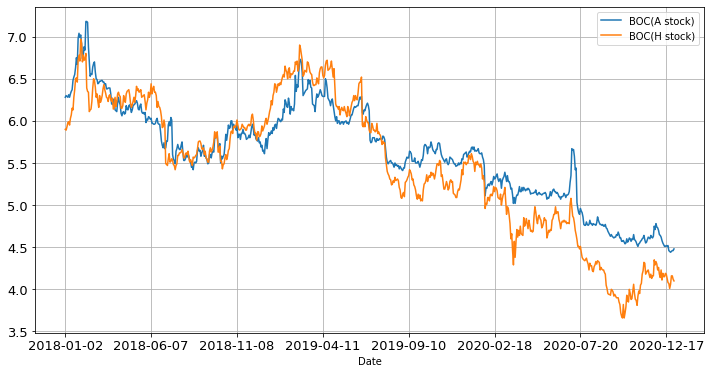

In [4]:
import pandas as pd

P_BoComm=pd.read_excel('BOC_AH daily(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
P_BoComm.plot(figsize=(12,6),grid=True,fontsize=13)

In [5]:
import numpy as np
#R_BoComm=(P_BoComm-P_BoComm.shift(1))/P_BoComm.shift(1) #Return
R_BoComm=np.log(P_BoComm/P_BoComm.shift(1)) #Log Return
R_BoComm=R_BoComm.dropna()
R_BoComm.describe()

,BOC(A stock),BOC(H stock)
count,709.000000,709.000000
mean,-0.000476,-0.000513
std,0.011261,0.014506
min,-0.078359,-0.091483
25%,-0.005268,-0.008084
50%,0.000000,0.000000
75%,0.004906,0.007582
max,0.058093,0.063226


In [6]:
import statsmodels.api as sma
Y=R_BoComm.iloc[:,-1]
X=R_BoComm.iloc[:,0]
X_addcons=sma.add_constant(X) # add constant to independent variable
model=sma.OLS(endog=Y,exog=X_addcons)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           BOC(H stock)   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     230.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           2.77e-45
Time:                        15:50:50   Log-Likelihood:                 2095.9
No. Observations:                 709   AIC:                            -4188.
Df Residuals:                     707   BIC:                            -4179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.000     -0.441      0.659      -0.001       0.001
BOC(A stock)     0.6388      0.042     15.185      0.000       0.556       0.721
==============================================================================
Omnibus:                      127.567   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1036.312
Skew:                          -0.545   Prob(JB):                    9.29e-226
Kurtosis:                       8.821   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
result.params #output inception and correlation

const          -0.000209
BOC(A stock)    0.638844
dtype: float64

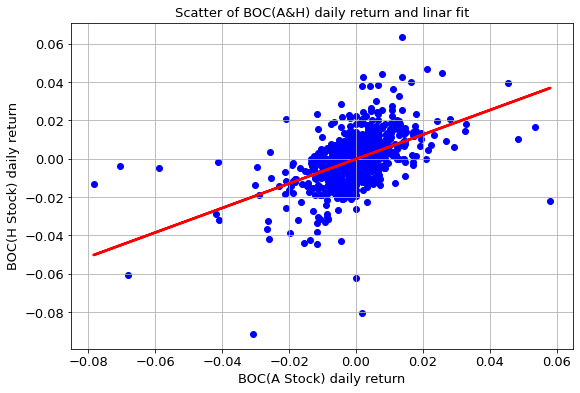

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.scatter(X,Y,c='b',marker='o')
plt.plot(X,result.params[0]+result.params[1]*X,'r-',lw=2.5) #plot linar fit 
plt.xticks(fontsize=13)
plt.xlabel('BOC(A Stock) daily return',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('BOC(H Stock) daily return',fontsize=13)
plt.title('Scatter of BOC(A&H) daily return and linar fit',fontsize=13)
plt.grid()
plt.show()